<a href="https://colab.research.google.com/github/rofiat13/apple-tomato-classifier/blob/main/Apples_Tomatoes_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Setup:


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

In [2]:
# Set up GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# Mount Google Drive and import dataset
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/My Drive/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = os.listdir(dataset_path)

In [5]:
os.listdir(os.path.join(dataset_path, 'tomatoes'))

['img_p1_47.jpeg',
 'img_p1_72.jpeg',
 'img_p1_37.jpeg',
 'img_p2_39.jpeg',
 'img_p3_37.jpeg',
 'img_p1_101.jpeg',
 'img_p1_111.jpeg',
 'img_p2_65.jpeg',
 'img_p3_54.jpeg',
 'img_p3_44.jpeg',
 'img_p2_31.jpeg',
 'img_p3_50.jpeg',
 'img_p3_25.jpeg',
 'img_p3_18.jpeg',
 'img_p3_76.jpeg',
 'img_p2_33.jpeg',
 'img_p3_84.jpeg',
 'img_p1_49.jpeg',
 'img_p2_20.jpeg',
 'img_p2_41.jpeg',
 'img_p2_77.jpeg',
 'img_p3_62.jpeg',
 'img_p3_40.jpeg',
 'img_p2_92.jpeg',
 'img_p3_111.jpeg',
 'img_p3_122.jpeg',
 'img_p3_120.jpeg',
 'img_p2_118.jpeg',
 'img_p2_103.jpeg',
 'img_p3_88.jpeg',
 'img_p2_71.jpeg',
 'img_p3_5.jpeg',
 'img_p3_42.jpeg',
 'img_p1_103.jpeg',
 'img_p3_70.jpeg',
 'img_p1_109.jpeg',
 'img_p1_5.jpeg',
 'img_p3_28.jpeg',
 'img_p1_45.jpeg',
 'img_p2_11.jpeg',
 'img_p3_72.jpeg',
 'img_p3_96.jpeg',
 'img_p3_10.jpeg',
 'img_p2_97.jpeg',
 'img_p3_60.jpeg',
 'img_p3_22.jpeg',
 'img_p1_68.jpeg',
 'img_p2_35.jpeg',
 'img_p1_10.jpeg',
 'img_p3_12.jpeg',
 'img_p3_97.jpeg',
 'img_p1_35.jpeg',
 'img

In [6]:
# Load data as TensorFlow dataset
data = tf.keras.utils.image_dataset_from_directory(dataset_path)

Found 294 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [10]:
# Labels
# Class 1 = Tomatoes
# Class 2 =  Apples
batch[1]

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

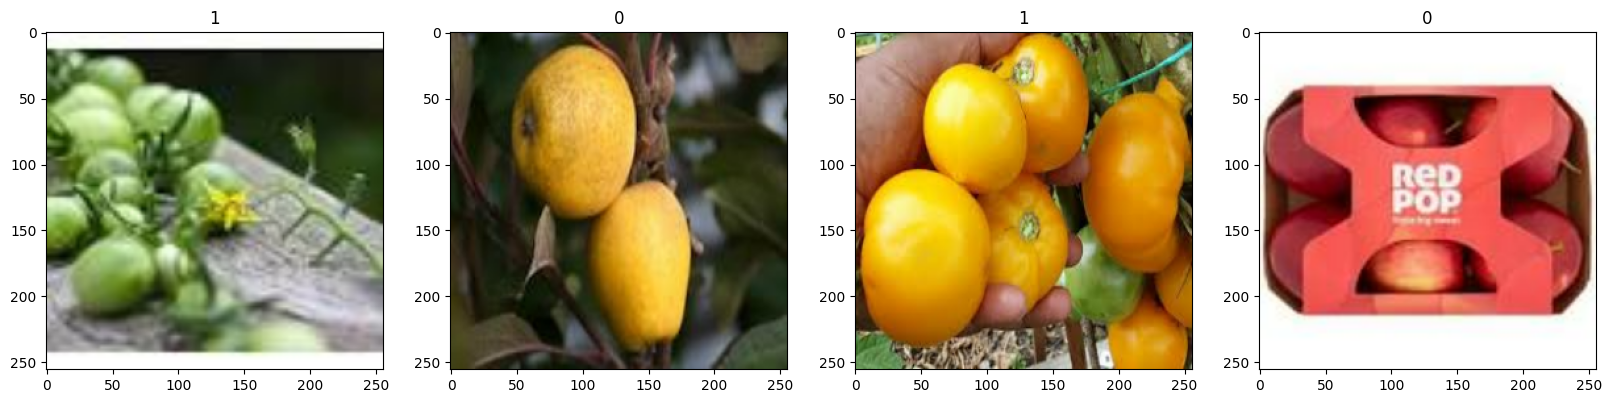

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## Data Preprocessing:

In [12]:
# Scale data

data = data.map(lambda x,y: (x/255, y))

In [13]:
scaled_iterator = data.as_numpy_iterator()

In [14]:
batch = scaled_iterator.next()

In [15]:
batch[0].max()

1.0

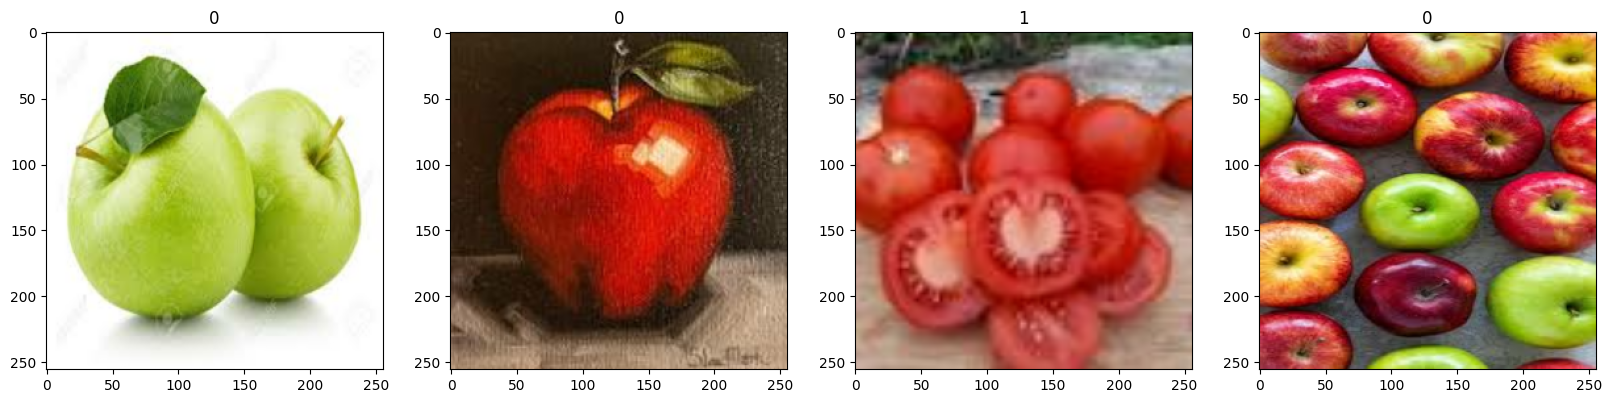

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [17]:
# Split data into training, validation, and test sets
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
# Define the CNN model architecture
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Model Training:

In [24]:
logdir = 'logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(data, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 27s 2s/step - loss: 0.7852 - accuracy: 0.4660 - val_loss: 0.6865 - val_accuracy: 0.6562
Epoch 2/20
10/10 [==============================] - 21s 2s/step - loss: 0.6660 - accuracy: 0.6497 - val_loss: 0.6283 - val_accuracy: 0.6250
Epoch 3/20
10/10 [==============================] - 22s 2s/step - loss: 0.5847 - accuracy: 0.6939 - val_loss: 0.6309 - val_accuracy: 0.6719
Epoch 4/20
10/10 [==============================] - 21s 2s/step - loss: 0.5174 - accuracy: 0.7721 - val_loss: 0.3935 - val_accuracy: 0.8594
Epoch 5/20
10/10 [==============================] - 23s 2s/step - loss: 0.3826 - accuracy: 0.8503 - val_loss: 0.5815 - val_accuracy: 0.6875
Epoch 6/20
10/10 [==============================] - 21s 2s/step - loss: 0.3964 - accuracy: 0.8231 - val_loss: 0.2810 - val_accuracy: 0.8906
Epoch 7/20
10/10 [==============================] - 22s 2s/step - loss: 0.2537 - accuracy: 0.8980 - val_loss: 0.1198 - val_accuracy: 1.0000
Epoch 8/20
10/10 [==

In [27]:
hist.history

{'loss': [0.7851670980453491,
  0.6660451292991638,
  0.584712564945221,
  0.5173987150192261,
  0.3825981318950653,
  0.3963736593723297,
  0.25366997718811035,
  0.13844424486160278,
  0.11345519870519638,
  0.10806803405284882,
  0.07025828957557678,
  0.07035842537879944,
  0.04074804484844208,
  0.054162148386240005,
  0.04724957421422005,
  0.013383027166128159,
  0.008600978180766106,
  0.1680252104997635,
  0.05165648087859154,
  0.05731557309627533],
 'accuracy': [0.4659864008426666,
  0.6496598720550537,
  0.6938775777816772,
  0.7721088528633118,
  0.8503401279449463,
  0.8231292366981506,
  0.8979591727256775,
  0.9591836929321289,
  0.9659863710403442,
  0.9659863710403442,
  0.9795918464660645,
  0.9795918464660645,
  0.9897959232330322,
  0.9795918464660645,
  0.9897959232330322,
  1.0,
  1.0,
  0.942176878452301,
  0.9897959232330322,
  0.9863945841789246],
 'val_loss': [0.686548113822937,
  0.6282832026481628,
  0.6309069395065308,
  0.39354461431503296,
  0.5814675092

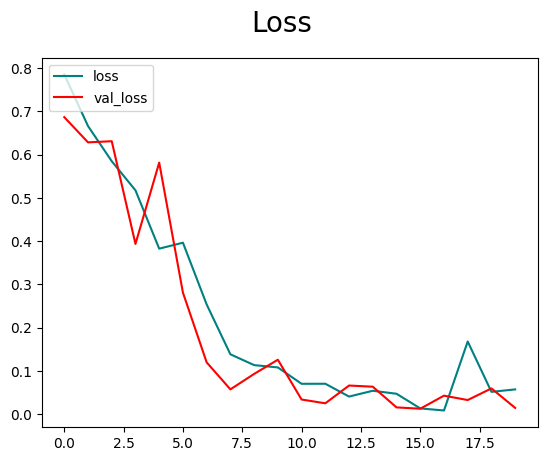

In [28]:
# Plot loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

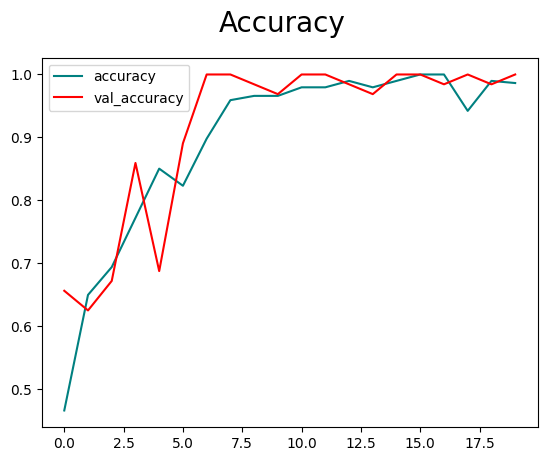

In [29]:
# Plot accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Model Evaluation:

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 221ms/step


In [33]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## Model Prediction:

In [95]:
import cv2

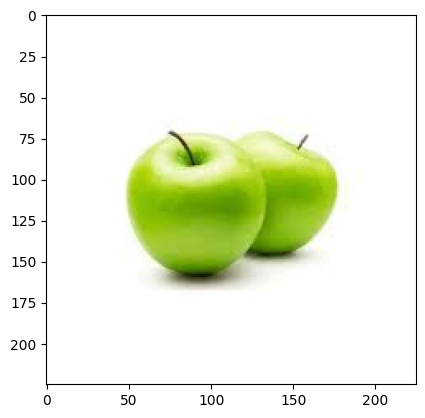

In [108]:
# Load and preprocess image
img = cv2.imread('apples.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

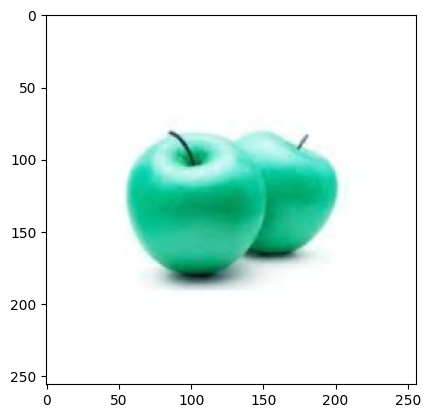

In [109]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [110]:
# Make predictions
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 39ms/step


In [111]:
yhat

array([[0.13902135]], dtype=float32)

In [112]:
if yhat> 0.5:
  print(f'Predicted class is a tomato')
else:
  print(f'Predicted class is an apple')

Predicted class is an apple


## Save and Load Model:

In [63]:
from tensorflow.keras.models import load_model

In [64]:
# Save model
model.save(os.path.join('models', 'appleortomato.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
# Load model
new_model = load_model(os.path.join('models', 'appleortomato.h5'))

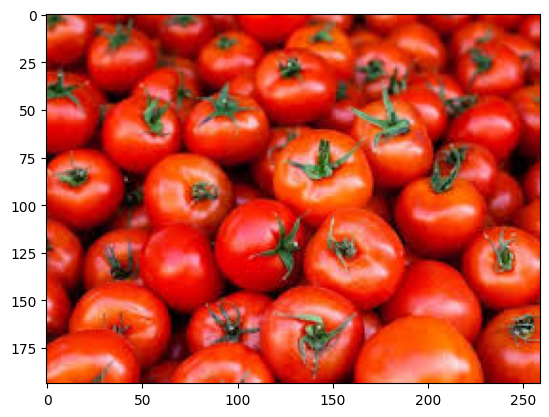

In [103]:
img_ = cv2.imread('tomato.jpg')
plt.imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))
plt.show()

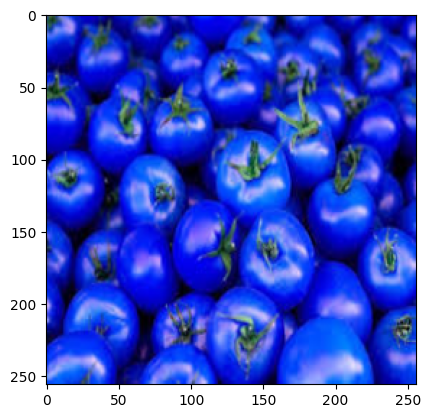

In [104]:
resize_ = tf.image.resize(img_, (256, 256))
plt.imshow(resize_.numpy().astype(int))
plt.show()

In [105]:
yhat_new = new_model.predict(np.expand_dims(resize_/255, 0))

1/1 [==============================] - 0s 108ms/step


In [106]:
yhat_new

array([[1.]], dtype=float32)

In [107]:
if yhat_new> 0.5:
  print(f'Predicted class is a tomato')
else:
  print(f'Predicted class is an apple')

Predicted class is a tomato
